In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from glob import glob
import os
%matplotlib widget

def merge_picarro_files(root_folder):
    #list to store data
    all_data = []
        # loop through day subfolders
    for day_folder in os.listdir(root_folder):
        day_path = os.path.join(root_folder, day_folder)

        #loop through files of each day folder
        for file_name in os.listdir(day_path):
            file_path = os.path.join(day_path, file_name)
        
        # read .dat using fwf
            df = pd.read_fwf(file_path)
            
            # append data 
            all_data.append(df)

            # combine into a df
    merged_df = pd.concat(all_data, ignore_index=True)

    # create datetime column 
    merged_df['datetime'] = pd.to_datetime(merged_df['DATE'] + ' ' + merged_df['TIME'], errors='coerce')

    # drop date and time columns 
    merged_df.drop(columns=['DATE', 'TIME'], inplace=True)

    #  datetime first
    columns = ['datetime'] + [col for col in merged_df.columns if col != 'datetime']
    merged_df = merged_df[columns]

    return merged_df
    

def qc(df):
    
    df['CO2_corrected'] = (df['CO2_dry'] + 0.63141) / 0.99357
    df['CH4_corrected'] = df['CH4_dry'] * (2.024799 / 2.0238)
    return df




In [26]:
root_folder = os.path.expanduser('C:/Users/ica/OneDrive - Plymouth Marine Laboratory/vscode/TOC_analysis/data/11')  # yourpath
picarro_df = merge_picarro_files(root_folder)
picarro_df.set_index('datetime', inplace=True)


In [32]:
start_time = datetime.datetime(2024, 11,21, 18, 0, 0)
end_time = datetime.datetime(2024, 11, 22, 8, 0, 0)


df = picarro_df.loc[start_time:end_time]
df = qc(df)

C:\Users\ica\AppData\Local\Temp\ipykernel_15748\3873642896.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2_corrected'] = (df['CO2_dry'] + 0.63141) / 0.99357
C:\Users\ica\AppData\Local\Temp\ipykernel_15748\3873642896.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CH4_corrected'] = df['CH4_dry'] * (2.024799 / 2.0238)


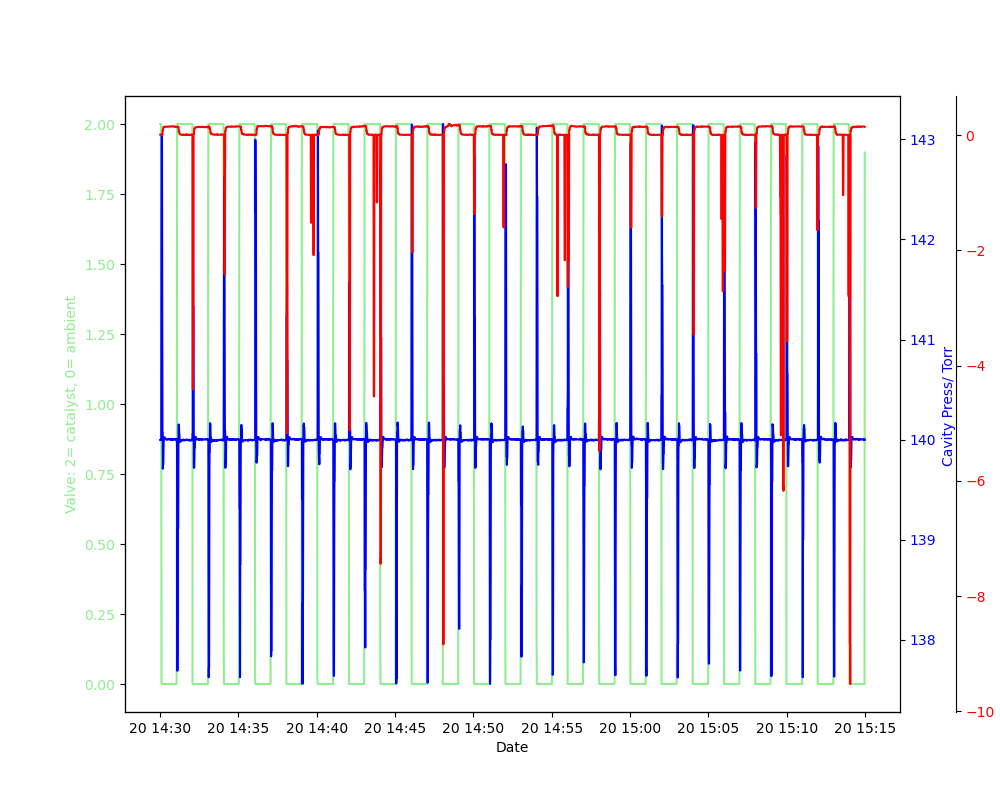

In [23]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(df.index, df.solenoid_valves, label='Valve: 2= catalyst, 0= ambient', color='lightgreen')
ax1.set_xlabel('Date')
ax1.set_ylabel('Valve: 2= catalyst, 0= ambient', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')


ax2 = ax1.twinx()
ax2.plot(df.index, df.CavityPressure, label='Cavity pres', color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cavity Press/ Torr ', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Offset the third axis
ax3.plot(df.index, df.CO, label='CO', color='red')
ax3.set_ylabel('Co /ppm', color='red')
ax3.tick_params(axis='y', labelcolor='red')





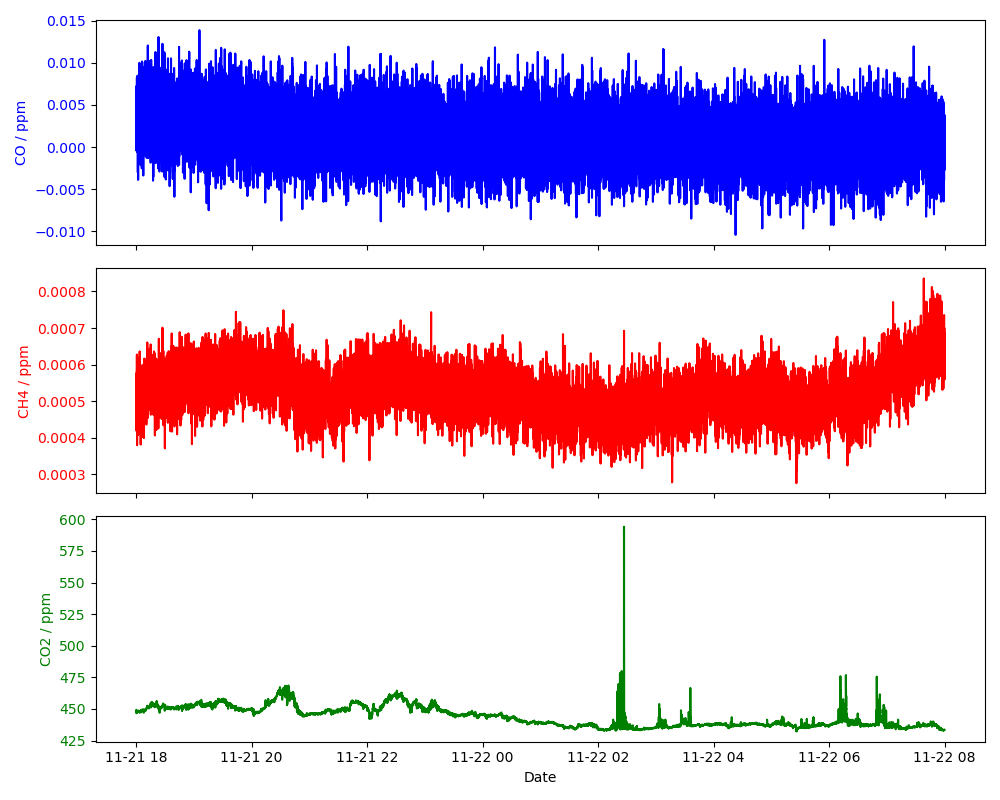

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(10, 8))

# Plot for CO
ax1.plot(df.index, df.CO, label='CO / ppm', color='blue')
ax1.set_ylabel('CO / ppm', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot for CH4
ax2.plot(df.index, df.CH4_corrected, label='CH4 / ppm', color='red')
ax2.set_ylabel('CH4 / ppm', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot for CO2
ax3.plot(df.index, df.CO2_corrected, label='CO2 / ppm', color='green')
ax3.set_xlabel('Date')
ax3.set_ylabel('CO2 / ppm', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
plt.figure()
plt.plot(df.index, df.CO)
plt.xlabel('Date')
plt.ylabel('CO / ppm')